In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
project_path = "/content/drive/My Drive/DataScienceProjects/spotify-song-analysis"
data_path = f"{project_path}/data"

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(f"{data_path}/songs_normalize.csv")

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
df['genre_simple'] = df['genre'].str.split(', ').str[0].explode()
df['genre_simple'].value_counts().head()

,count
genre_simple,
pop,936
hip hop,776
rock,162
Dance/Electronic,41
set(),22


In [10]:
genre_counts = df['genre_simple'].value_counts()
popular_genres = genre_counts[genre_counts > 30].index.tolist()
df = df[df['genre_simple'].isin(popular_genres)]

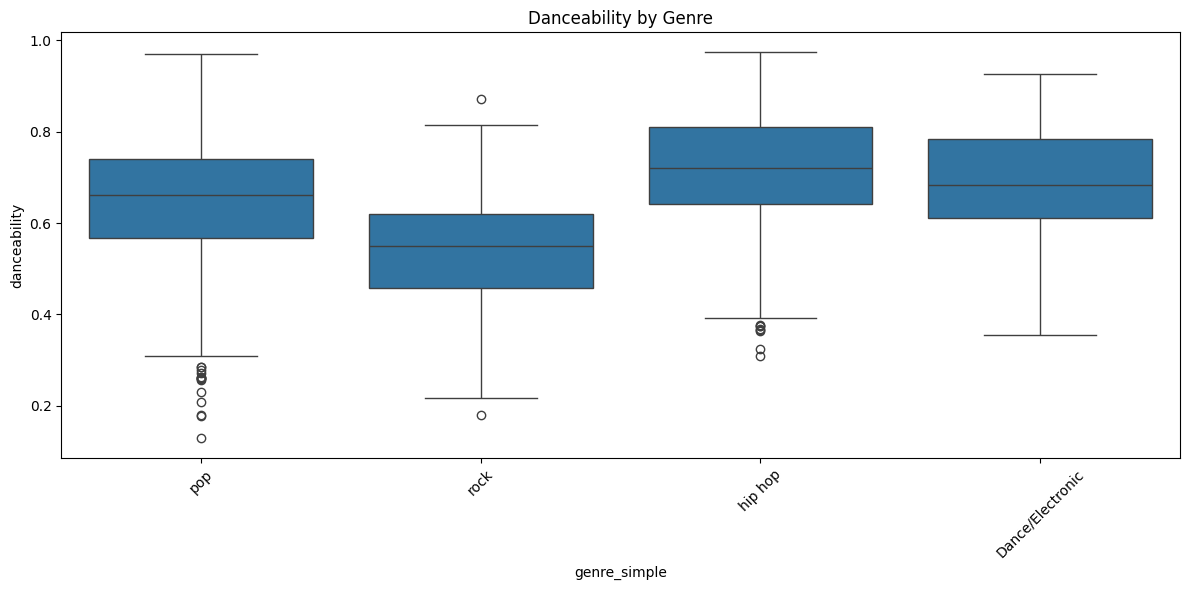

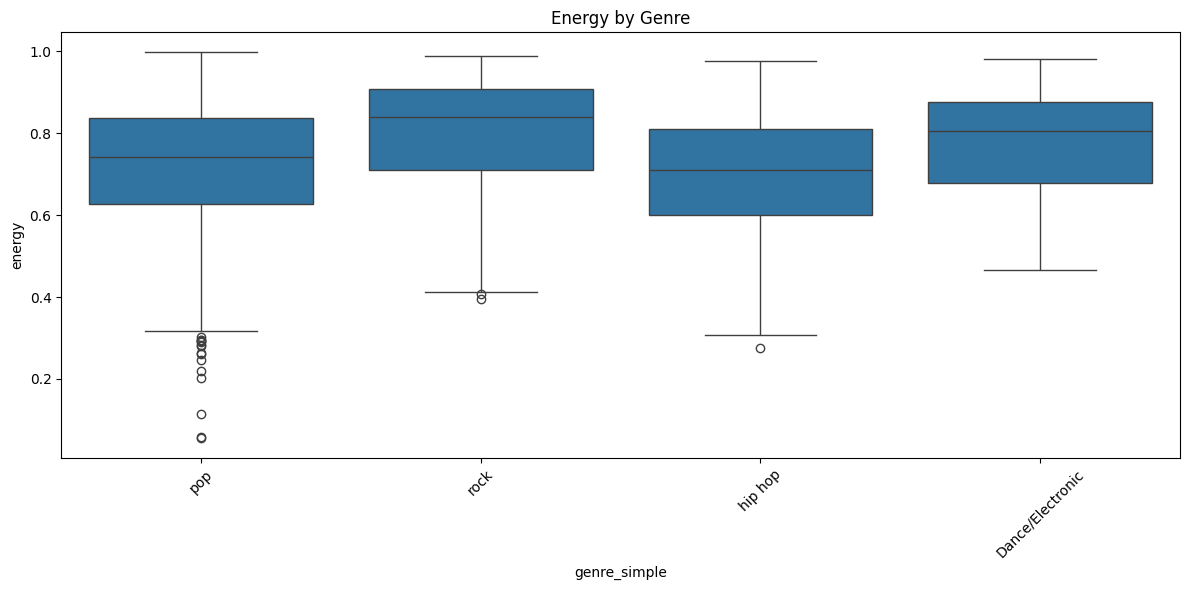

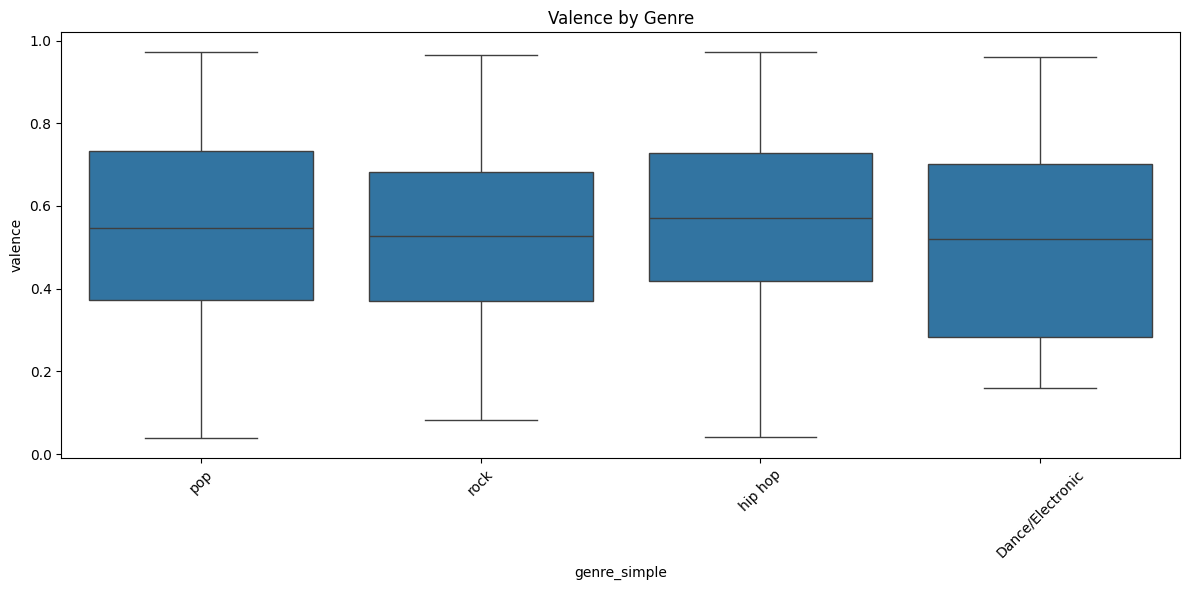

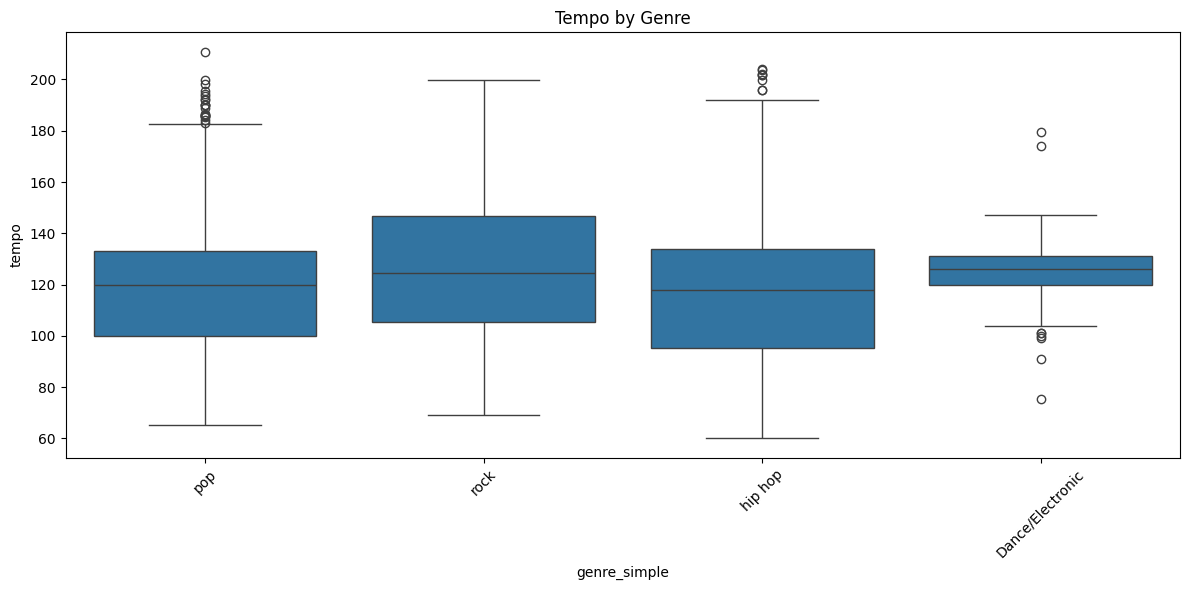

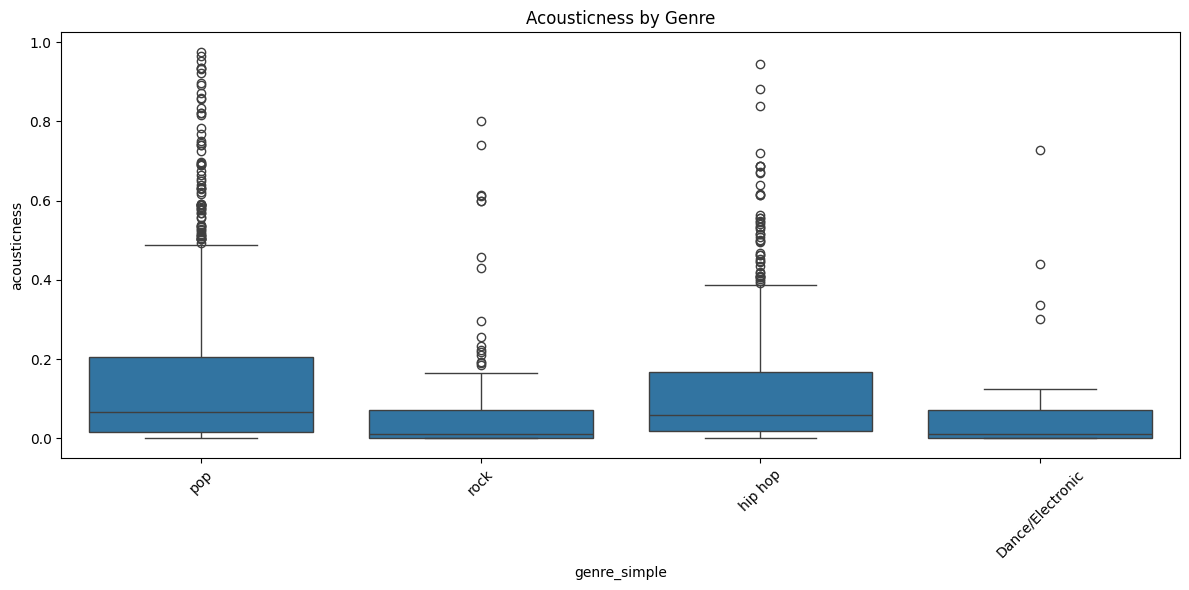

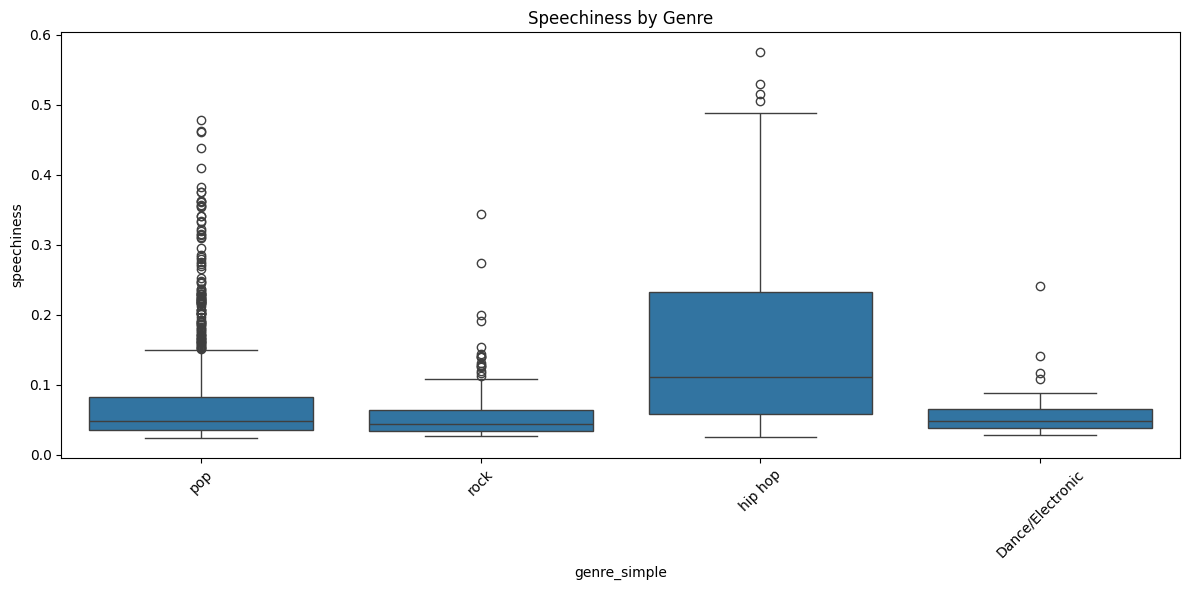

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'speechiness']

for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data = df, x='genre_simple', y=feature)
    plt.xticks(rotation=45)
    plt.title(f"{feature.capitalize()} by Genre")
    plt.tight_layout()
    plt.show()

In [18]:
genre_profiles = df.groupby('genre_simple')[features].mean()
genre_profiles.head()

,danceability,energy,valence,tempo,acousticness,speechiness
genre_simple,,,,,,
Dance/Electronic,0.684610,0.775829,0.523585,125.507537,0.068404,0.059251
hip hop,0.717843,0.698778,0.560668,118.098709,0.116326,0.152094
pop,0.647753,0.721256,0.547501,120.596985,0.146330,0.075110
rock,0.545216,0.799673,0.516181,127.067741,0.068977,0.058532


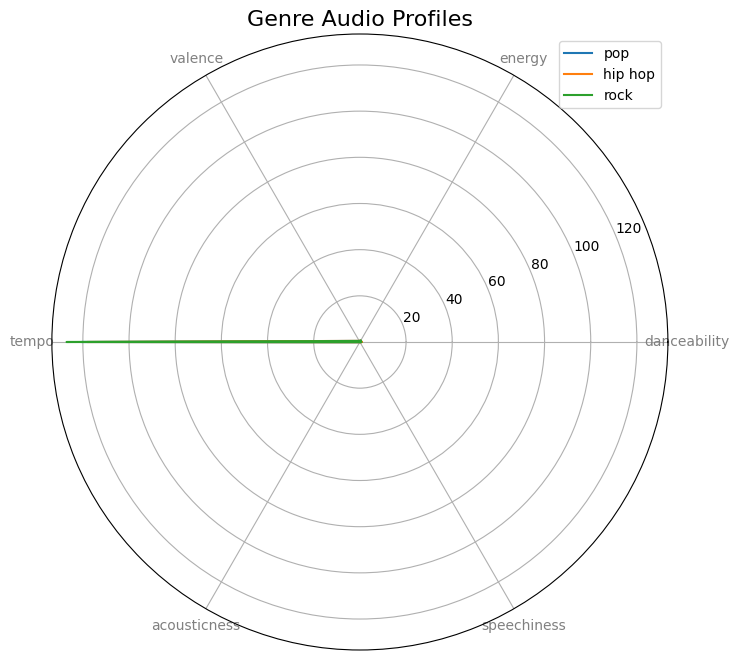

In [37]:
import numpy as np

def plot_radar_chart(data, genres, features):
  num_vars = len(features)
  angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
  angles += angles[:1]

  plt.figure(figsize=(8, 8))
  for genre in genres:
    values = data.loc[genre].tolist()
    values += values[:1]
    plt.polar(angles, values, label = genre)

  plt.xticks(angles[:-1], features, color = 'gray', size = 10)
  plt.title('Genre Audio Profiles', size = 16)
  plt.legend(loc = 'upper right')
  plt.show()

selected_genres = ['pop', 'hip hop', 'rock']
plot_radar_chart(genre_profiles, selected_genres, features)


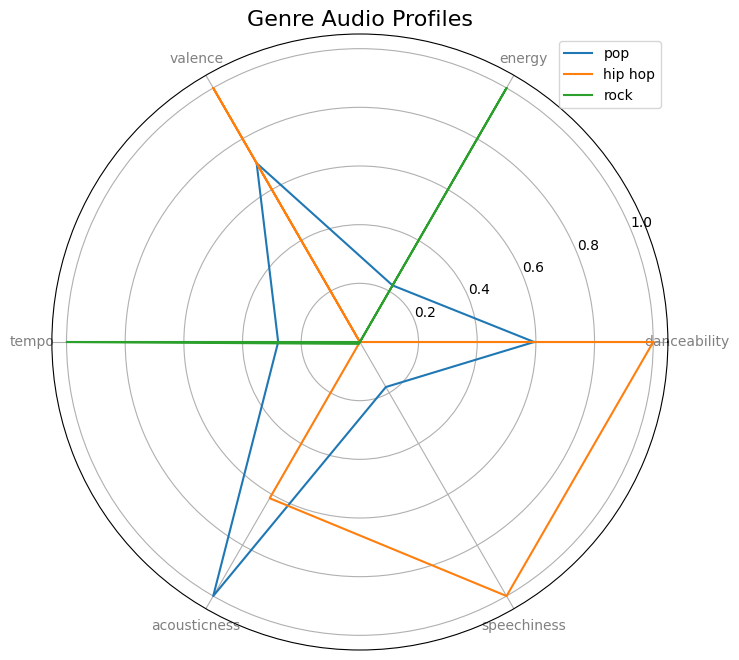

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
selected_profiles = pd.DataFrame(scaler.fit_transform(genre_profiles), index=genre_profiles.index, columns=genre_profiles.columns)

plot_radar_chart(selected_profiles, selected_genres, features)

Observations:
*   All genres show a low acousticness median.
*   All genres show a strong and high exhibition of tempo.
*   Pop shows a low in speechiness, energy, and tempo; moderate in danceability and valence; and high in acousticness.


